## Importing Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #for standardizing data
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.decomposition import PCA
import plotly.express as px


In [2]:
%matplotlib inline

## Importing Dataset

In [3]:
path = r'C:\Users\shyou\OneDrive\Documents\Data Analitics Course\Achievement6\Global SuperStore Project'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'GlobalSuperstore_clean.csv'))

In [5]:
df.shape

(51290, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    51290 non-null  int64  
 1   Unnamed: 0      51290 non-null  int64  
 2   id              51290 non-null  int64  
 3   order_id        51290 non-null  object 
 4   order_date      51290 non-null  object 
 5   ship_mode       51290 non-null  object 
 6   customer_id     51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  market          51290 non-null  object 
 12  product_id      51290 non-null  object 
 13  category        51290 non-null  object 
 14  Sub_category    51290 non-null  object 
 15  sales           51290 non-null  float64
 16  quantity        51290 non-null  int64  
 17  discount        51290 non-null 

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'order_id', 'order_date',
       'ship_mode', 'customer_id', 'segment', 'city', 'state', 'country',
       'market', 'product_id', 'category', 'Sub_category', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'year', 'month',
       'sales_category'],
      dtype='object')

In [8]:
# Drop categorical and unnecessary columns

df_1 = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'order_id', 'order_date',
       'ship_mode', 'customer_id', 'segment', 'city', 'state', 'country',
       'market', 'product_id', 'category', 'Sub_category', 'year', 'month',
       'sales_category','quantity'], axis=1)

In [9]:
df_1

,sales,discount,profit,shipping_cost
0,13.08,0.0,4.56,1.03
1,252.16,0.0,90.72,13.45
2,193.28,0.0,54.08,9.63
3,35.44,0.0,4.96,1.37
4,71.60,0.0,11.44,3.79
...,...,...,...,...
51285,11.07,0.0,3.42,1.98
51286,61.44,0.0,18.42,13.02
51287,80.52,0.0,20.88,8.78
51288,130.44,0.0,33.84,18.97


## Preprocessing and Standardizing the Data

In [10]:
scaler = StandardScaler()
df_1.values[:] = scaler.fit_transform(df_1)

In [12]:
df_1

,sales,discount,profit,shipping_cost
0,-0.478731,-0.67321,-0.137955,-0.442366
1,0.011628,-0.67321,0.356254,-0.225598
2,-0.109136,-0.67321,0.146089,-0.292269
3,-0.432870,-0.67321,-0.135661,-0.436432
4,-0.358705,-0.67321,-0.098492,-0.394195
...,...,...,...,...
51285,-0.482854,-0.67321,-0.144494,-0.425786
51286,-0.379544,-0.67321,-0.058455,-0.233103
51287,-0.340410,-0.67321,-0.044344,-0.307104
51288,-0.238023,-0.67321,0.029993,-0.129257


### Fit standardized data using PCA

In [14]:
pca = PCA()
pca.fit(df_1)

PCA()

In [15]:
pca.explained_variance_ratio_

array([0.53751275, 0.26644585, 0.14246912, 0.05357228])

Text(0, 0.5, 'Cumulative Explained Variance')

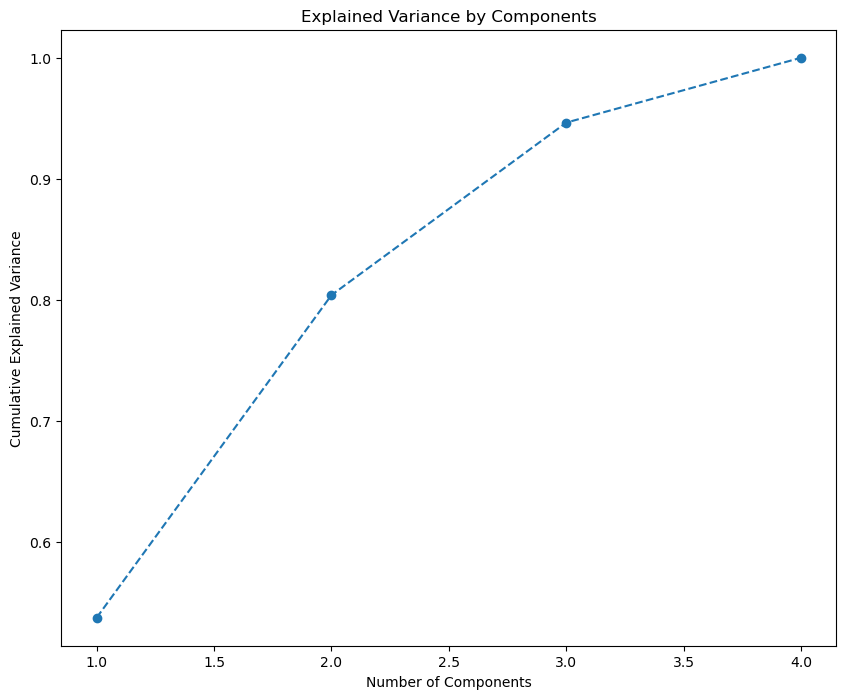

In [17]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [18]:
pca = PCA(n_components = 3)

In [19]:
pca.fit(df_1)

PCA(n_components=3)

In [20]:
pca.transform(df_1)

array([[-0.46596804, -0.79526316,  0.21802637],
       [ 0.20346126, -0.75660497, -0.03766848],
       [-0.012937  , -0.741248  ,  0.08919027],
       ...,
       [-0.25716695, -0.74501175,  0.21014644],
       [-0.05534049, -0.68408402,  0.2302883 ],
       [-0.40507557, -0.79320119,  0.19324113]])

In [21]:
scores_pca = pca.transform(df_1)

In [22]:
scores_pca

array([[-0.46596804, -0.79526316,  0.21802637],
       [ 0.20346126, -0.75660497, -0.03766848],
       [-0.012937  , -0.741248  ,  0.08919027],
       ...,
       [-0.25716695, -0.74501175,  0.21014644],
       [-0.05534049, -0.68408402,  0.2302883 ],
       [-0.40507557, -0.79320119,  0.19324113]])

In [23]:
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'wcss')

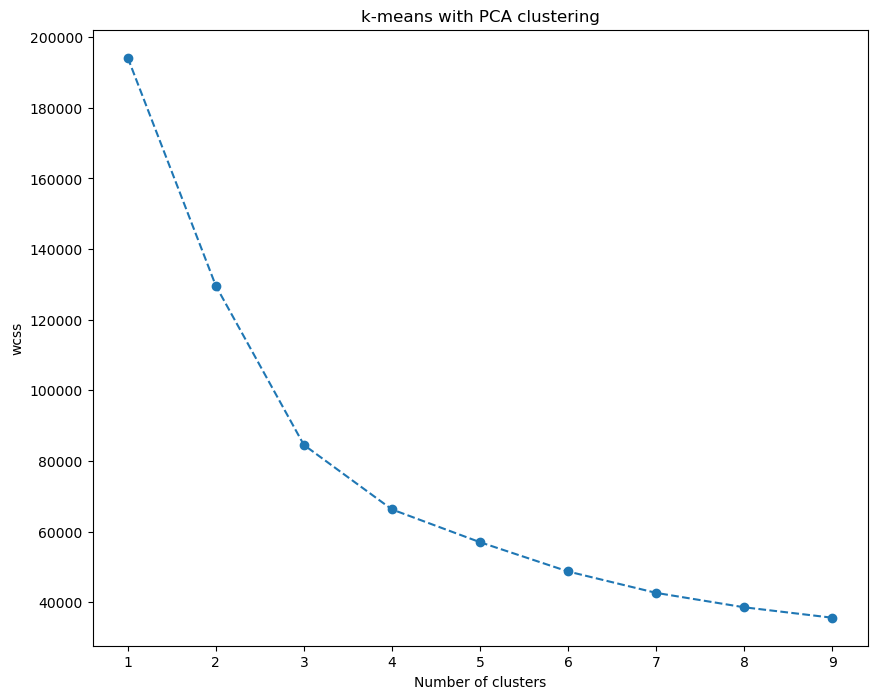

In [24]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.title('k-means with PCA clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [32]:
kmeans_pca = KMeans(n_clusters =4, init = 'k-means++', random_state = 20)

In [33]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=20)

In [34]:
kmeans = KMeans(n_clusters = 4)

In [35]:
kmeans.fit(df_1)

KMeans(n_clusters=4)

In [36]:
df_1['clusters'] = kmeans.fit_predict(df_1)

In [37]:
df_1

,sales,discount,profit,shipping_cost,clusters
0,-0.478731,-0.67321,-0.137955,-0.442366,0
1,0.011628,-0.67321,0.356254,-0.225598,0
2,-0.109136,-0.67321,0.146089,-0.292269,0
3,-0.432870,-0.67321,-0.135661,-0.436432,0
4,-0.358705,-0.67321,-0.098492,-0.394195,0
...,...,...,...,...,...
51285,-0.482854,-0.67321,-0.144494,-0.425786,0
51286,-0.379544,-0.67321,-0.058455,-0.233103,0
51287,-0.340410,-0.67321,-0.044344,-0.307104,0
51288,-0.238023,-0.67321,0.029993,-0.129257,0


In [38]:
df_1['clusters'].value_counts()

0    35911
2    10546
1     4270
3      563
Name: clusters, dtype: int64

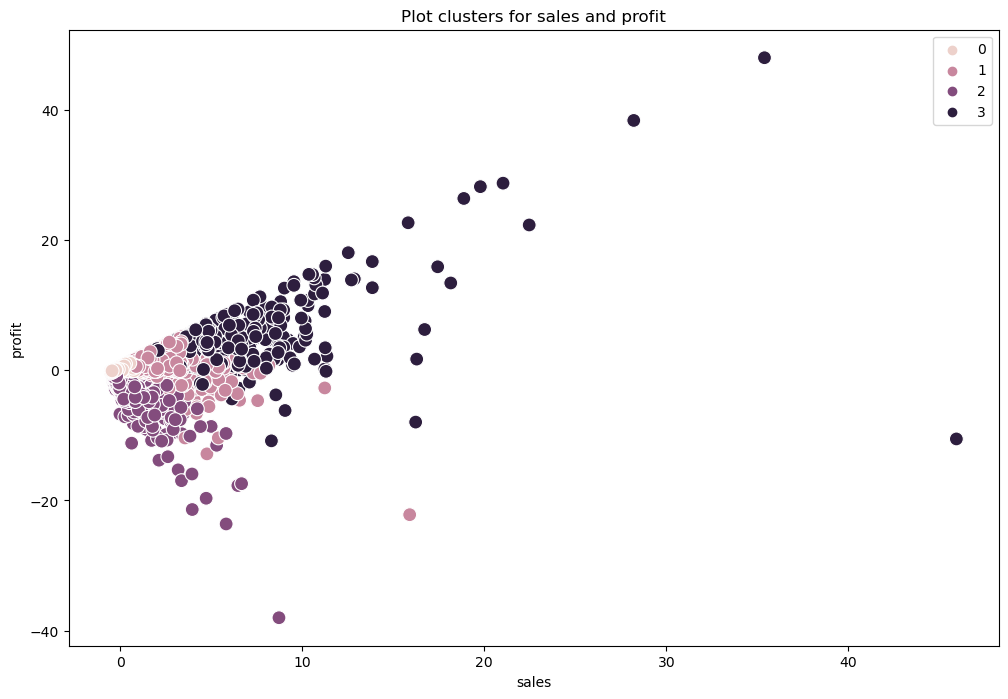

In [46]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['sales'], y=df_1['profit'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('sales') 
plt.ylabel('profit')
plt.title('Plot clusters for sales and profit')
plt.show()

In [40]:
df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'dark pink'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
df_1.groupby('cluster').agg({'sales':['mean', 'median'], 
                         'profit':['mean', 'median'], 
                         'shipping_cost':['mean', 'median'],'discount':['mean', 'median']})

sales              profit           shipping_cost            \
                 mean    median      mean    median          mean    median   
cluster                                                                       
dark pink    1.701428  1.422078  0.950195  0.909038      1.643371  1.328780   
dark purple  5.732474  4.876418  4.457372  4.051999      6.007030  5.540225   
pink        -0.225479 -0.346194 -0.009727 -0.088741     -0.226261 -0.337647   
purple      -0.227130 -0.405141 -0.589562 -0.280367     -0.215618 -0.382240   

             discount            
                 mean    median  
cluster                          
dark pink   -0.370953 -0.673210  
dark purple -0.438707 -0.673210  
pink        -0.470478 -0.673210  
purple       1.775677  1.682194

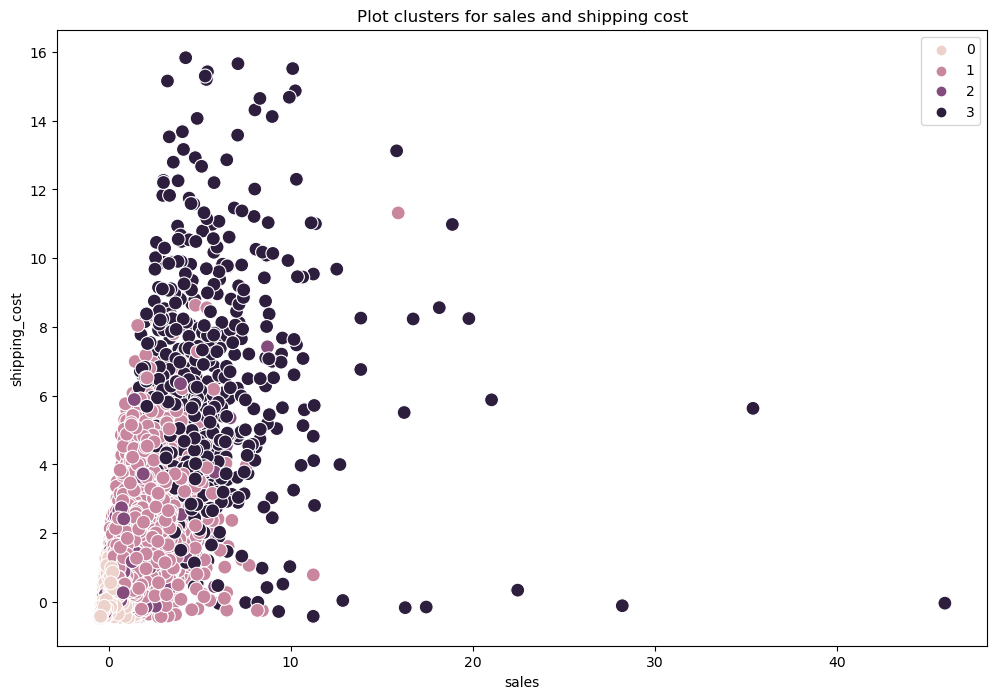

In [47]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['sales'], y=df_1['shipping_cost'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('sales') 
plt.ylabel('shipping_cost')
plt.title('Plot clusters for sales and shipping cost')
plt.show()

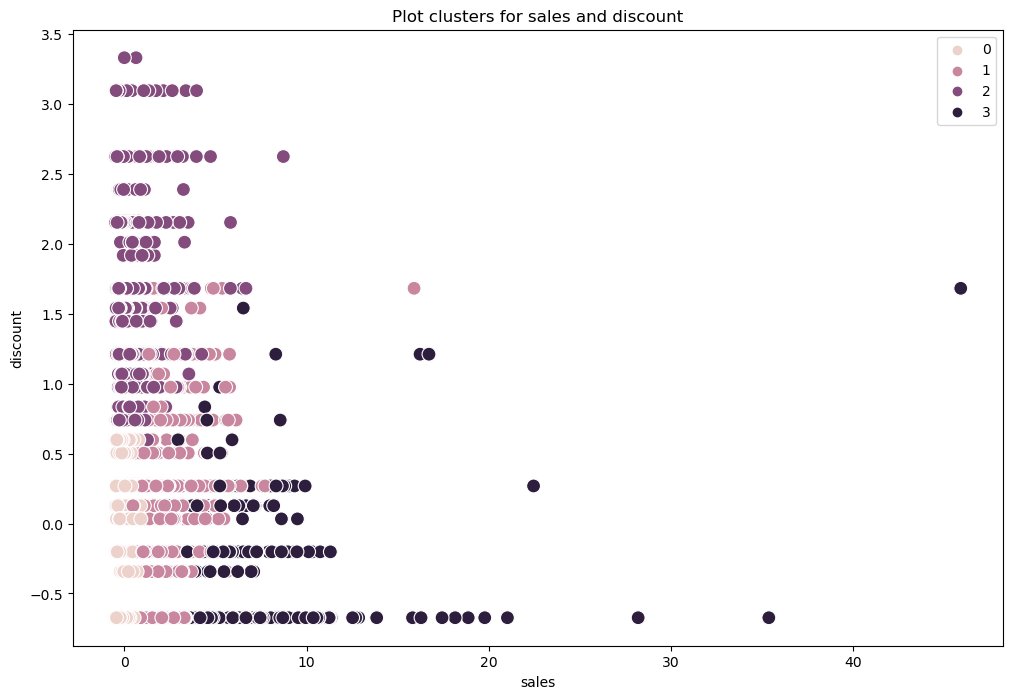

In [49]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['sales'], y=df_1['discount'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('sales') 
plt.ylabel('discount')
plt.title('Plot clusters for sales and discount')
plt.show()

## Conclusion of analysis (k-means)
#### In an unsupervised Analysis, we don't have already the outputs and results, but we want to have the outputs in the clustering shape and we are going to discover hidden patterns or natural data groupings.
#### Based on this analysis We found that the most suitable number of clusters for this dataset is 4. On the other hand, due to the difference in the scale of the sales values with other values in the dataset( profit, discount, and shipping cost), at first, we standardized the scale of the data.
#### In the clustering of sales and profit, it can be seen that the strongest cluster is dark purple, in this cluster, the highest profit has been obtained for the units of sales.Also, this conclusion can be obtained by checking the mean and median based on the obtained clusters.
#### In the sales and shipping cost cluster, logically, with the increase in sales, the shipping cost also increases, although there are some exceptions., logically, with the increase in sales, the shipping cost also increases, although there are some exceptions.
#### In the sales and discount cluster, it seems that the relationship between these two variables can be defined not in clustering but in classification.